In [1]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
import pandas as pd
from tensorflow import random
from sklearn.model_selection import train_test_split
# import required packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
feats= pd.read_csv('./data/HCV_feats.csv')
target=pd.read_csv('./data/HCV_target.csv')

In [3]:
X_train,X_test,y_train,y_test=train_test_split(feats,target,test_size=0.2)

In [4]:
model_1= Sequential()
model_1.add(Dense(units=3,activation='tanh',input_dim=X_train.shape[1]))
model_1.add(Dense(units=1,activation='sigmoid'))
model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
print(model_1.summary())
model_1_history=model_1.fit(X_train,y_train,validation_split=0.1,batch_size=20,epochs=100,verbose=0,shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 87        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


In [5]:
model_2= Sequential()
model_2.add(Dense(units=4,activation='relu',input_dim=X_train.shape[1]))
model_2.add(Dense(units=3,activation='relu',input_dim=X_train.shape[1]))
model_2.add(Dense(units=1,activation='sigmoid'))
model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])
print(model_2.summary())
model_2_history=model_1.fit(X_train,y_train,validation_split=0.1,batch_size=20,epochs=100,verbose=0,shuffle=False)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 116       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

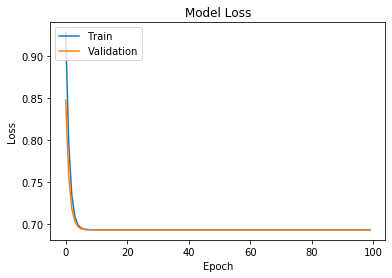

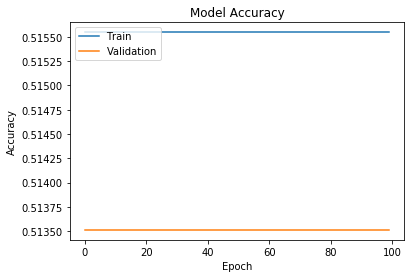

In [7]:
plot(model_1_history)

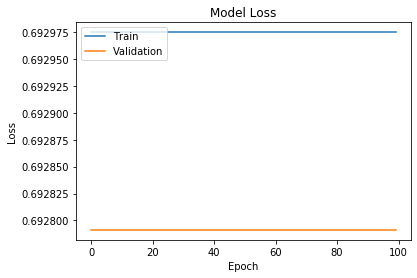

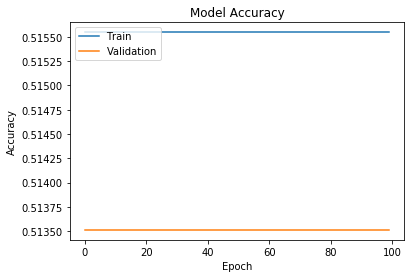

In [8]:
plot(model_2_history)

In [9]:
def print_metrics(model):
    res = model.evaluate(X_test, y_test, batch_size=None, verbose=0)
    print(f"Test Loss:{res[0]:.4f} Accuracy:{res[1]:.4f}")

In [10]:
print_metrics(model_1)
print_metrics(model_2)

Test Loss:0.6919 Accuracy:0.5271
Test Loss:5.3308 Accuracy:0.5090
